# Logestic regression

#### By predicting the click-through rate, an advertising company select the most potential visitors who are most likely to respond to the ads, analyzing their browsing history and showing the most relevant ads based on the interest of the user.

#### This task is important for every advertising agency because the commercial value of promotions on the Internet depends only on how the user responds to them. A user’s response to ads is very valuable to every ad company because it allows the company to select the ads that are most relevant to users.

<a href="https://thecleverprogrammer.com/2021/01/24/click-through-rate-prediction-with-machine-learning/
">click rate source</a>

In [91]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [92]:
data = pd.read_csv('aadvertising.csv')
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [93]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [95]:
data['Male'].value_counts()

0    519
1    481
Name: Male, dtype: int64

## EDA

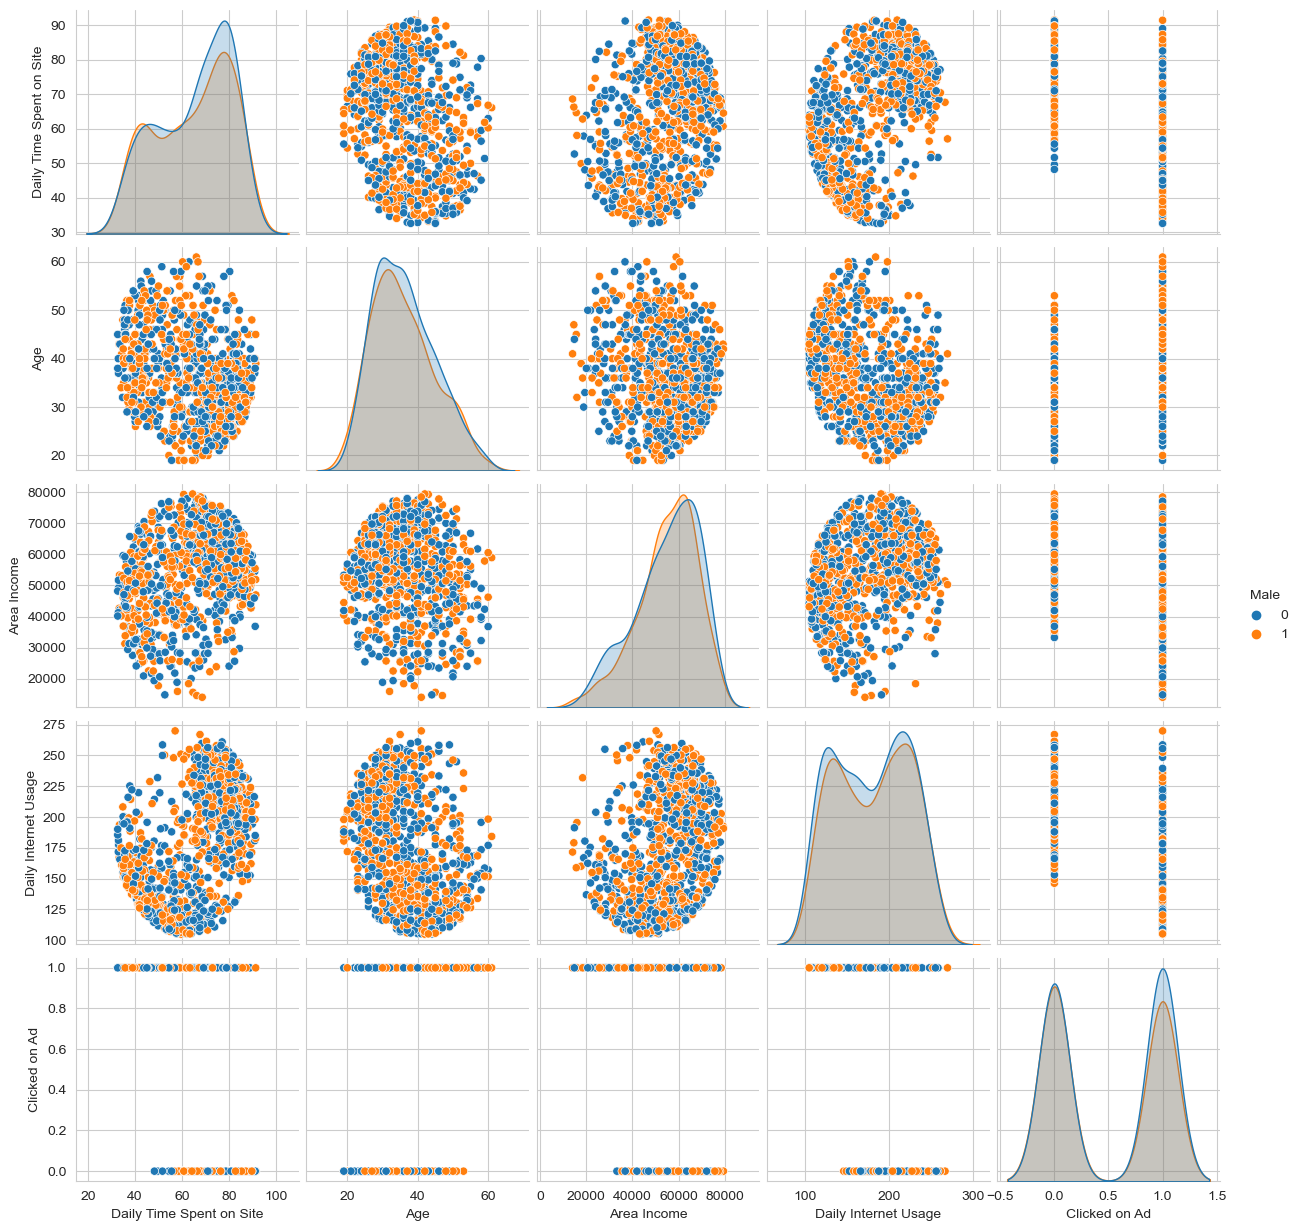

In [96]:
sns.pairplot(data, hue = 'Male')

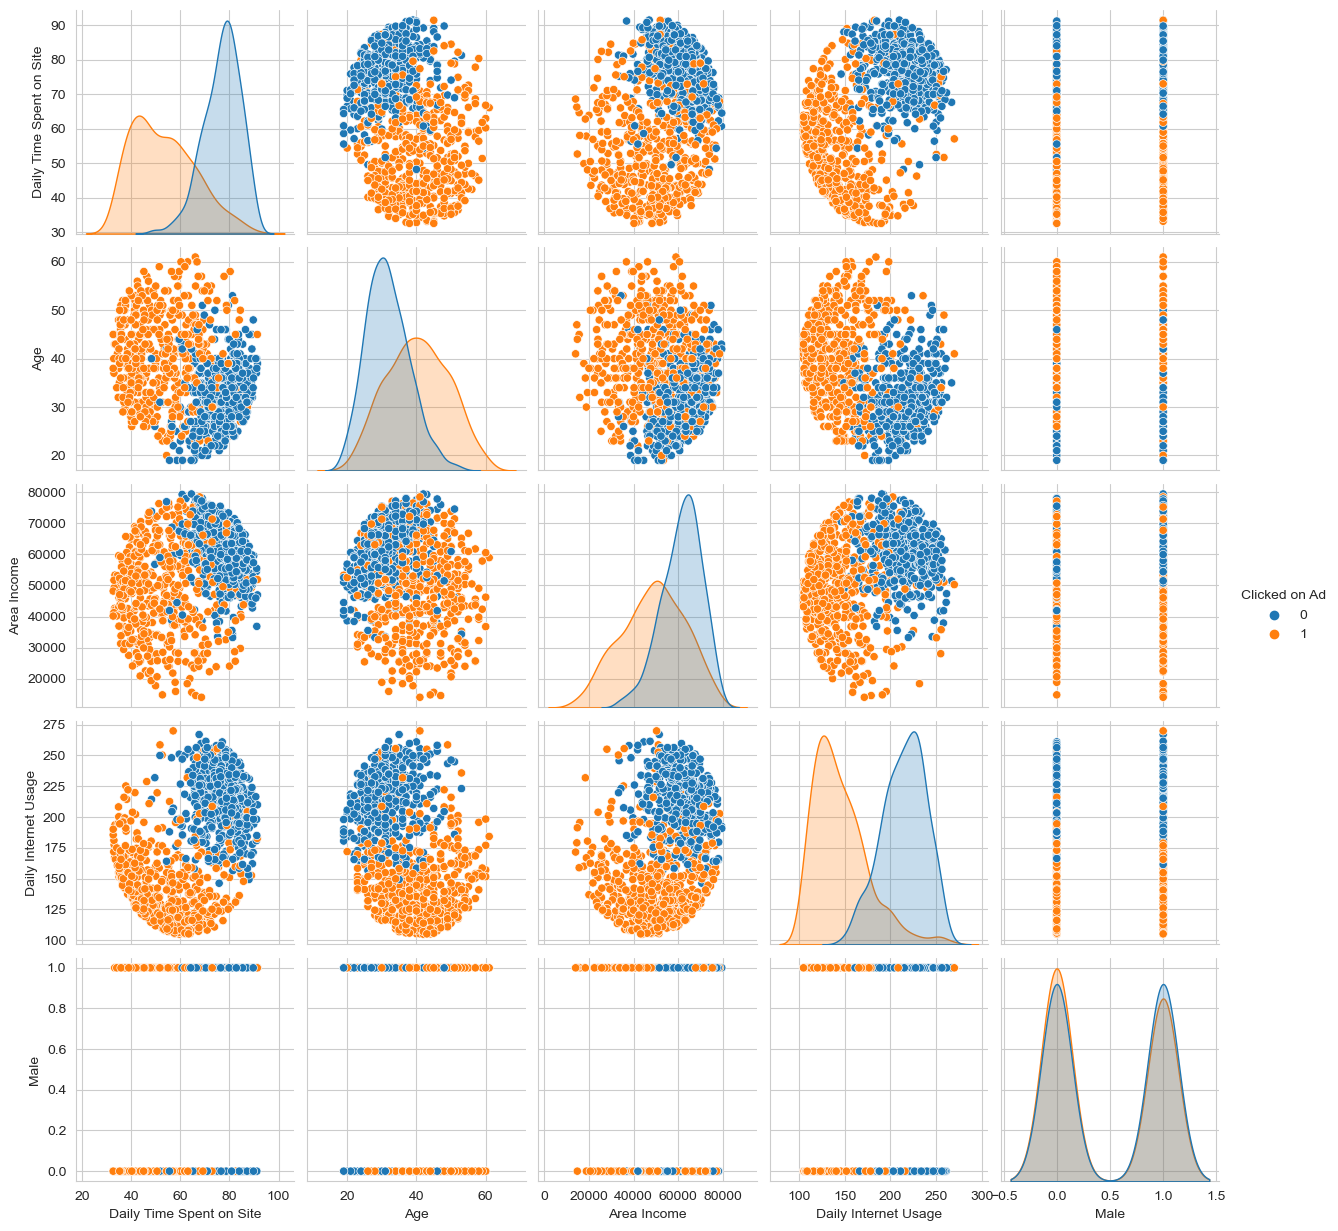

In [97]:
sns.pairplot(data, hue = 'Clicked on Ad')

<Axes: xlabel='Age', ylabel='Count'>

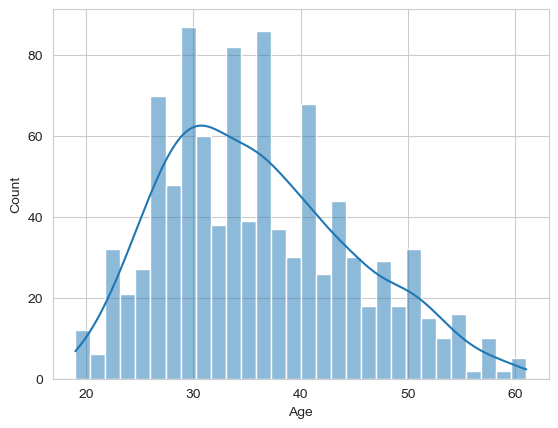

In [98]:
sns.set_style('whitegrid')
sns.histplot(data['Age'], bins = 30, kde = True)

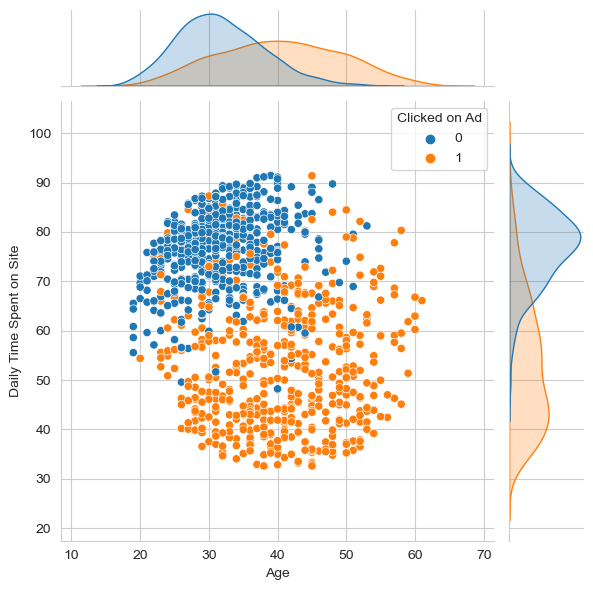

In [99]:
sns.jointplot(x = 'Age', y = 'Daily Time Spent on Site', data = data, hue = 'Clicked on Ad')

In [100]:
data['Country'].value_counts().head(15)

France            9
Czech Republic    9
Peru              8
Turkey            8
Greece            8
Senegal           8
Liberia           8
Australia         8
South Africa      8
Micronesia        8
Cyprus            8
Afghanistan       8
Taiwan            7
Cambodia          7
Luxembourg        7
Name: Country, dtype: int64

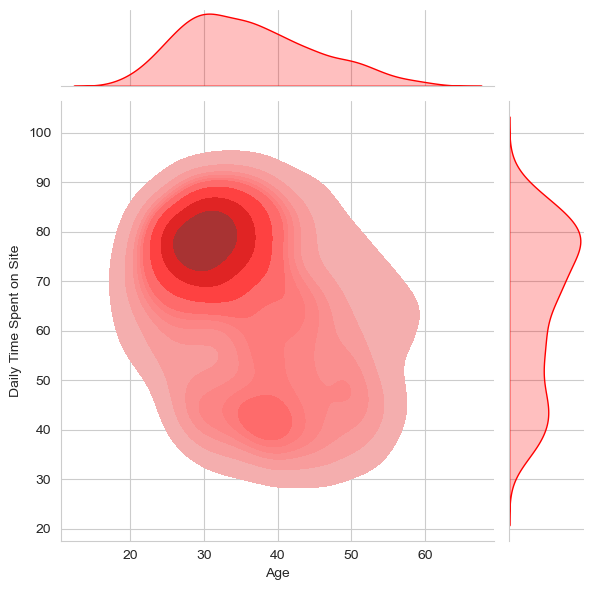

In [101]:
sns.jointplot(x = 'Age',  y = 'Daily Time Spent on Site', data = data, color = 'red' ,kind = 'kde', fill = True)

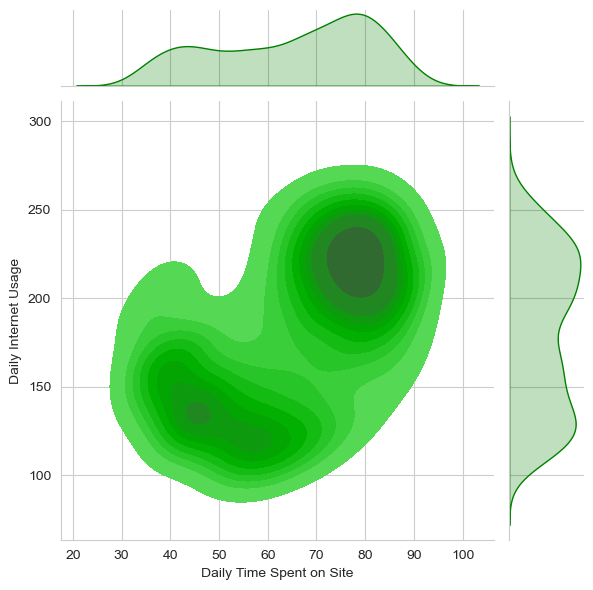

In [102]:
sns.jointplot(x = 'Daily Time Spent on Site',  y = 'Daily Internet Usage', data = data,kind = 'kde', color = 'green', fill = True)

In [103]:
print(data.isnull().sum())

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64


<Axes: xlabel='hour', ylabel='Count'>

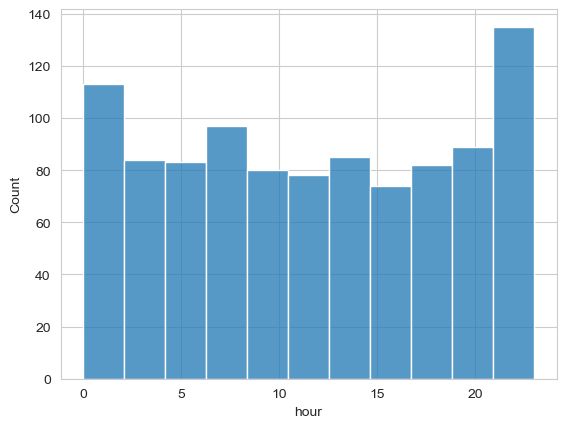

In [104]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data['hour'] = data['Timestamp'].apply(lambda x : x.hour)
sns.histplot(data['hour'])


<Axes: xlabel='DOF', ylabel='Count'>

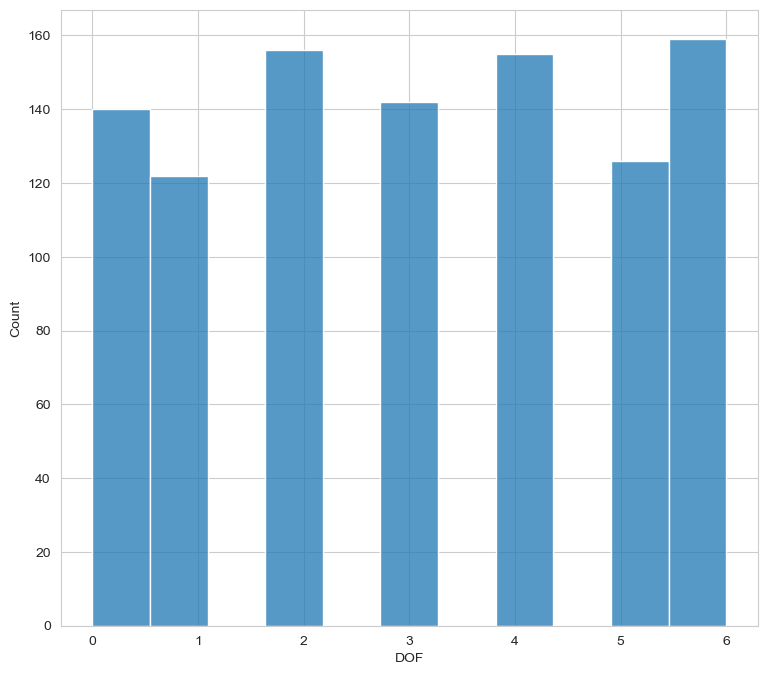

In [105]:
data['Timestamp'].apply(lambda x : x.hour).value_counts()

data['DOF'] = data['Timestamp'].apply(lambda x : x.dayofweek)
#data

plt.figure(figsize=(9, 8))
sns.histplot(data['DOF'])

0     45
1     32
2     36
3     42
4     42
5     44
6     39
7     54
8     43
9     49
10    31
11    40
12    38
13    42
14    43
15    35
16    39
17    41
18    41
19    39
20    50
21    48
22    43
23    44
Name: Timestamp, dtype: int64

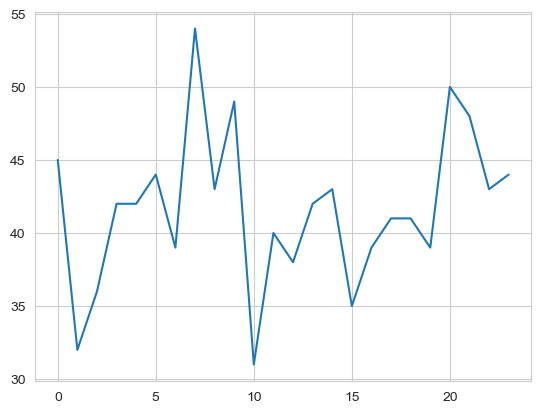

In [106]:
data['Timestamp'].apply(lambda x : x.hour).value_counts().sort_index().plot()

data['Timestamp'].apply(lambda x : x.hour).value_counts().sort_index()

0    140
1    122
2    156
3    142
4    155
5    126
6    159
Name: Timestamp, dtype: int64

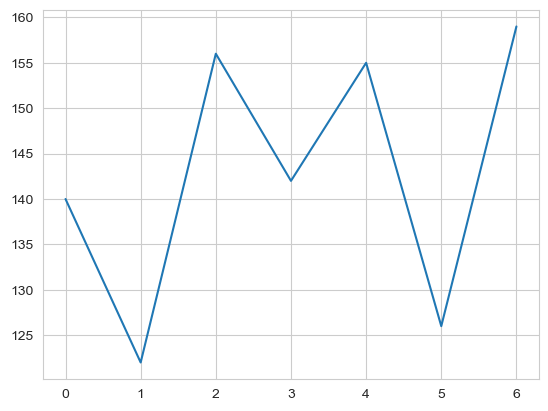

In [107]:
data['Timestamp'].apply(lambda x : x.dayofweek).value_counts().sort_index().plot()

data['Timestamp'].apply(lambda x : x.dayofweek).value_counts().sort_index()

In [108]:
data

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour,DOF
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,6
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,6
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1,21,3
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1,2,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1,17,0
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0,2,3


In [109]:
pd.get_dummies(data['DOF'], drop_first=True)

,1,2,3,4,5,6
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,1
4,0,0,0,1,0,0
...,...,...,...,...,...,...
995,0,0,1,0,0,0
996,0,0,0,1,0,0
997,0,0,0,0,0,0
998,0,0,1,0,0,0


In [110]:
data = pd.concat([data, pd.get_dummies(data['DOF'], drop_first=True)], axis = 1)
data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,hour,DOF,1,2,3,4,5,6
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,6,0,0,0,0,0,1
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0,20,6,0,0,0,0,0,1
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0,2,6,0,0,0,0,0,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0,3,4,0,0,0,1,0,0


In [111]:
data.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp', 'DOF', 'hour'], axis = 1, inplace = True)
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,1,2,3,4,5,6
0,68.95,35,61833.90,256.09,0,0,0,0,0,0,0,1
1,80.23,31,68441.85,193.77,1,0,0,0,0,0,0,0
2,69.47,26,59785.94,236.50,0,0,0,0,0,0,0,1
3,74.15,29,54806.18,245.89,1,0,0,0,0,0,0,1
4,68.37,35,73889.99,225.58,0,0,0,0,0,1,0,0


In [114]:
data.columns = data.columns.astype(str)  # make all columns str

In [116]:
x = data.drop('Clicked on Ad', axis = 1)

y = data['Clicked on Ad']

In [117]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=4)

In [119]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
#print(y_pred)

In [120]:
y_pred_proba=model.predict_proba(x_test)
print(y_pred_proba)

[[9.92839195e-01 7.16080490e-03]
 [9.64613005e-01 3.53869947e-02]
 [4.24104885e-02 9.57589512e-01]
 [5.32873886e-02 9.46712611e-01]
 [1.81652907e-03 9.98183471e-01]
 [9.86308146e-01 1.36918537e-02]
 [9.99174605e-01 8.25394951e-04]
 [3.15017355e-03 9.96849826e-01]
 [1.07207313e-01 8.92792687e-01]
 [1.73084267e-03 9.98269157e-01]
 [4.74292586e-01 5.25707414e-01]
 [1.20812124e-01 8.79187876e-01]
 [9.60075399e-01 3.99246009e-02]
 [8.67076400e-01 1.32923600e-01]
 [2.45224522e-03 9.97547755e-01]
 [2.92044844e-04 9.99707955e-01]
 [8.23779482e-01 1.76220518e-01]
 [2.48924016e-04 9.99751076e-01]
 [9.63151558e-01 3.68484416e-02]
 [1.22561441e-03 9.98774386e-01]
 [2.34733309e-03 9.97652667e-01]
 [8.93099777e-01 1.06900223e-01]
 [8.19295805e-01 1.80704195e-01]
 [1.91890975e-01 8.08109025e-01]
 [2.06756769e-02 9.79324323e-01]
 [9.11472607e-01 8.85273928e-02]
 [9.75245409e-01 2.47545912e-02]
 [2.54186441e-02 9.74581356e-01]
 [8.24860138e-01 1.75139862e-01]
 [9.97964960e-01 2.03503969e-03]
 [9.548631

In [121]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

from sklearn.metrics import f1_score
print(f1_score(y_test,y_pred))

0.94
0.9375
